In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
from keras import applications, optimizers
from keras.models import Sequential
from keras.applications.vgg16 import vgg16, preprocess_input
from keras.utils import to_categorical
from keras.models import *
from keras.layers import *
import numpy as np
import keras
import h5py
import functools
ile_ras = 40

Using TensorFlow backend.


In [2]:
cd gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [1]:
ls

gdrive/  sample_data/


In [0]:
hf = h5py.File('XYtrain_test.h5', 'r')
x_train = hf.get('x_train')
y_train = hf.get('y_train')
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = hf.get('x_test')
y_test = hf.get('y_test')
x_test = np.array(x_test)
y_test = np.array(y_test)
hf.close()

In [0]:
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'

                   

In [6]:
img_width, img_height = 224, 224
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
#for layer in model.layers[:-2]:
#   layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(4096, activation="relu")(x)
x = Dense(4096, activation="relu")(x)
predictions = Dense(40, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy",top5_acc])

model_final.summary()

W0618 17:10:03.090756 139678168983424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 17:10:03.165139 139678168983424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 17:10:03.195318 139678168983424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 17:10:03.249271 139678168983424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0618 17:10:03.822228 139678168983424 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
for l in model_final.layers:
    print(l.name, l.trainable)

input_1 False
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
flatten_1 True
dense_1 True
dense_2 True
dense_3 True


In [0]:
epochs = 50

dict_keys(['loss', 'acc', 'top5_acc'])


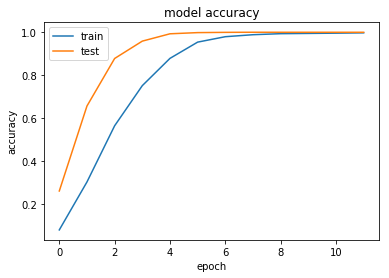

In [0]:
print(learning.history.keys())
plt.plot(learning.history['acc'])
plt.plot(learning.history['top5_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model_final.load_weights('case2.h5')

In [9]:
learning = model_final.fit(x_train, y_train, epochs=epochs, batch_size = 64, validation_split=0.1)
y_train = None
x_train = None

W0618 17:10:17.474398 139678168983424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5253 samples, validate on 584 samples
Epoch 1/50
5253/5253 [==============================] - 95s 18ms/step - loss: 3.6509 - acc: 0.0510 - top5_acc: 0.1999 - val_loss: 3.5352 - val_acc: 0.0805 - val_top5_acc: 0.3014
Epoch 2/50
5253/5253 [==============================] - 77s 15ms/step - loss: 3.3160 - acc: 0.1432 - top5_acc: 0.4249 - val_loss: 3.0533 - val_acc: 0.1866 - val_top5_acc: 0.4726
Epoch 3/50
5253/5253 [==============================] - 78s 15ms/step - loss: 2.5660 - acc: 0.2871 - top5_acc: 0.6328 - val_loss: 2.5264 - val_acc: 0.3151 - val_top5_acc: 0.6147
Epoch 4/50
5253/5253 [==============================] - 79s 15ms/step - loss: 1.8597 - acc: 0.4538 - top5_acc: 0.8013 - val_loss: 1.9758 - val_acc: 0.4127 - val_top5_acc: 0.7860
Epoch 5/50
5253/5253 [==============================] - 80s 15ms/step - loss: 1.3088 - acc: 0.6044 - top5_acc: 0.9018 - val_loss: 1.8615 - val_acc: 0.4332 - val_top5_acc: 0.8099
Epoch 6/50
5253/5253 [==============================] - 80s 15m

In [0]:
model_final.save_weights('case3a_weights.h5')
np.save("case3a_history",learning)

In [0]:
ls

 CASE1/              CASE3/              'Copy of Untitled0.ipynb'
 CASE2/              case3a_history.npy   Untitled0.ipynb
 case2_history.npy   case3a.ipynb         XYtrain.h5
 case2_weights.h5    case3a_weights.h5


In [0]:
y_test = to_categorical(y_test)
score = model_final.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1460/1460 [==============================] - 10s 7ms/step
Test loss: 1.8413159017693506
Test accuracy: 0.597260273646002


In [0]:
history1 = np.c_[learning.history["loss"],learning.history['acc'],learning.history['top5_acc'],learning.history['val_loss'],learning.history['val_acc'],learning.history['val_top5_acc']]
hist = np.array(history1)
np.savetxt("case3a_hist_n.txt", hist, delimiter=";")

In [0]:
eval = np.c_[score[0],score[1],score[2]]
sc = np.array(eval)
np.savetxt("case3a_evaluate.txt", sc, delimiter=";")